# Plotting

### SF Diversity Project - plotting data, descriptive fits, and functional model fits

#### Set constants

In [71]:
import numpy as np
import helper_fcns as hfunc
import model_responses as mod_resp
import autoreload
import matplotlib.pyplot as plt
%matplotlib inline

data_loc = '/ser/1.2/p2/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # CNS
expName = 'dataList.npy';
fitName = 'fitList.npy';
descrName = 'descrFits.npy';

nFam = 5;
nCon = 2;
plotSteps = 100; # how many steps for plotting descriptive functions?
sfPlot = np.logspace(-1, 1, plotSteps);

dL = np.load(data_loc + expName).item();
fitList = np.load(data_loc + fitName, encoding='latin1'); # no '.item()' because this is array of dictionaries...
descrFits = np.load(data_loc + descrName, encoding='latin1').item();

In [140]:
autoreload.reload(mod_resp);
autoreload.reload(hfunc);

#### Load data

In [197]:
cellNum = 59;

expData = np.load(data_loc + dL['unitName'][cellNum-1] + '_sfm.npy').item();
modFit = fitList[cellNum-1]['params']; # 
descrFit = descrFits[cellNum-1]['params']; # nFam x nCon x nDescrParams

a, modResp = mod_resp.SFMGiveBof(modFit, expData);
ori, con, sfmixResp = hfunc.organize_modResp(modResp, expData['sfm']['exp']['trial'])

ha!


#### Plot the main stuff - sfMix experiment with model predictions and descriptive fits

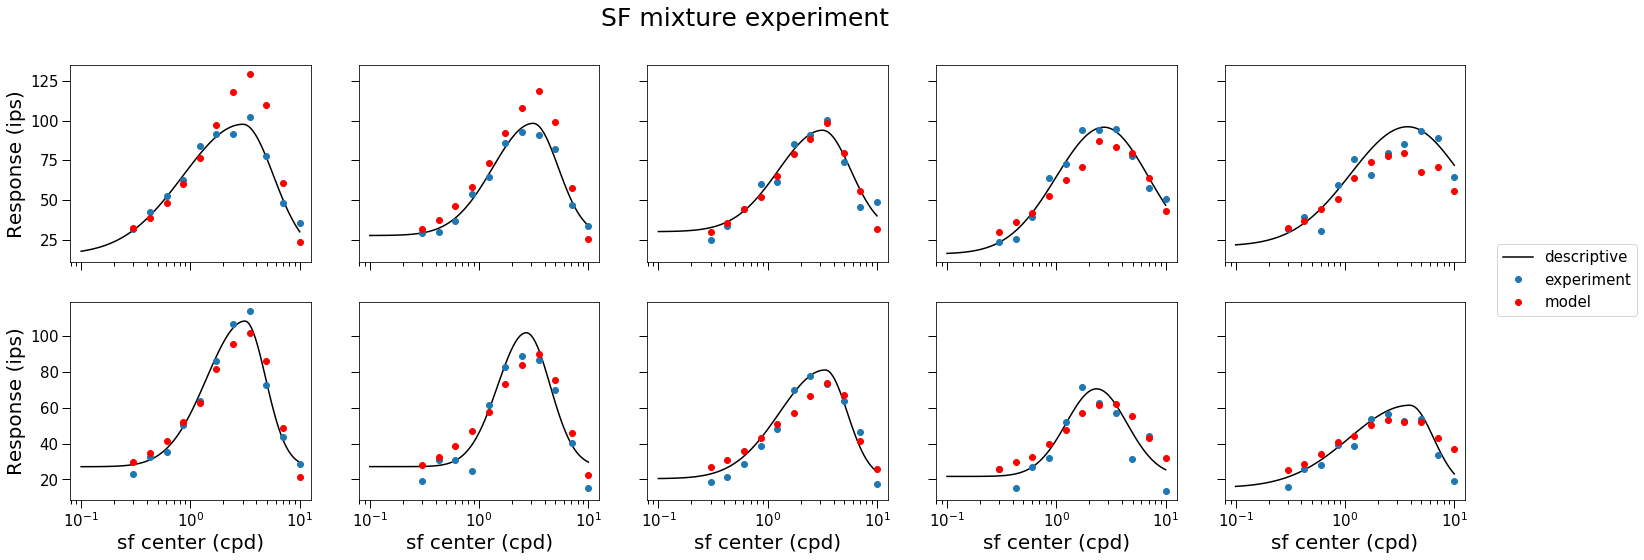

In [198]:
f, all_plots = plt.subplots(nCon, nFam, sharex='col', sharey='row', figsize=(25,8))

expSfCent = expData['sfm']['exp']['sf'][0][0];
expResponses = expData['sfm']['exp']['sfRateMean'];

for con in range(len(all_plots)): # contrast
    for fam in range(len(all_plots[0])): # family
        dfit = all_plots[con, fam].semilogx(sfPlot, hfunc.flexible_Gauss(descrFit[fam, con, :], sfPlot), 'k-'); # descriptive
        expPoints = all_plots[con, fam].semilogx(expSfCent, expResponses[fam][con], 'o'); # exp responses
        modPoints = all_plots[con, fam].semilogx(expSfCent, sfmixResp[fam, con, :], 'ro'); # model responses
        
        # pretty
        all_plots[con,fam].tick_params(labelsize=15, width=1, length=8);
        all_plots[con,fam].tick_params(width=1, length=4, which='minor'); # minor ticks, too...
        if con == 1:
            all_plots[con, fam].set_xlabel('sf center (cpd)', fontsize=20);
        if fam == 0:
            all_plots[con, fam].set_ylabel('Response (ips)', fontsize=20);
            
f.legend((dfit[0], expPoints[0], modPoints[0]), ('descriptive', 'experiment', 'model'), fontsize = 15, loc='right');
f.suptitle('SF mixture experiment', fontsize=25);